In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.describe().round(2)

,TV,radio,newspaper,sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,14.02
std,85.85,14.85,21.78,5.22
min,0.70,0.00,0.30,1.60
25%,74.38,9.98,12.75,10.38
50%,149.75,22.90,25.75,12.90
75%,218.82,36.52,45.10,17.40
max,296.40,49.60,114.00,27.00


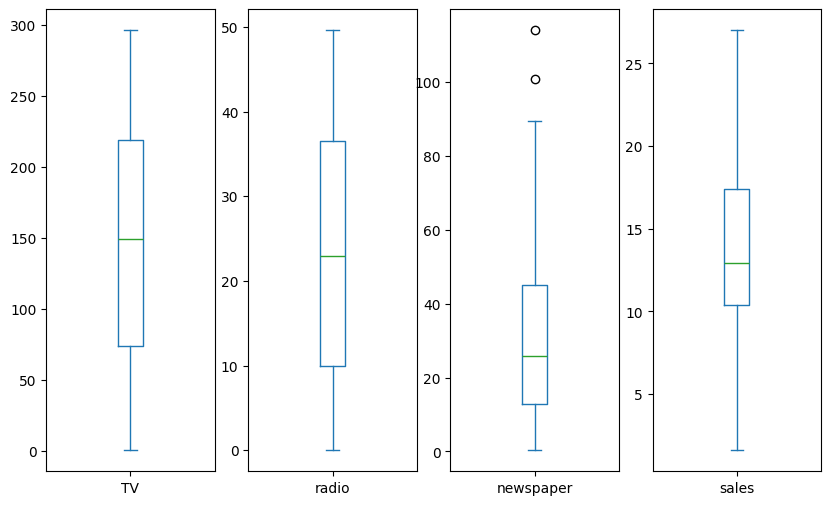

In [6]:
df.plot(kind='box', subplots=True, figsize=(10,6));

In [8]:
q1, q3 = df['newspaper'].quantile([0.25,0.75])
IQR = q3 - q1
UL = q3 + 1.5*IQR
LL = q1 - 1.5*IQR

#setting upper limit with condition to bring outliers to max upperlimit
df['newspaper'] = np.where(df['newspaper'] > UL, UL , df['newspaper'])

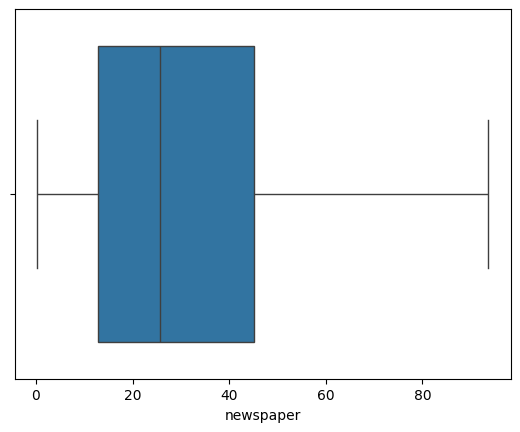

In [9]:
sns.boxplot(data= df, x = 'newspaper');

In [11]:
#splitting data and target
X = df.drop('sales', axis=1)
y = df['sales']

In [12]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=1)

In [21]:
#fitting Linear Regression Model and getting predictions
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred_test = lin_reg.predict(X_test)
y_pred_train = lin_reg.predict(X_train)

In [22]:
#getting coefficients
lin_reg.coef_

array([0.04695438, 0.17661103, 0.00181698])

In [23]:
lin_reg.intercept_

np.float64(2.9374323206621664)

In [24]:
#sales = 2.93 + (0.047 * tv) + (0.177 * radio) + (0.002 * newspaper)

In [25]:
#evaluating model performance
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
#calculate rmse for train and test data predictions
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse_train, rmse_test

(np.float64(1.7897445239312517), np.float64(1.3886376752307534))

In [27]:
#calculate r-squared for train and test predictions
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.8850029368457597, 0.9224851041983291)

In [28]:
#residuals calculation
residuals = y_test- y_pred_test

In [29]:
residuals

58     2.136176
40     0.158462
34     1.808332
102   -3.116706
184   -1.070779
198    1.708357
95     0.617890
4     -0.540296
29     1.347679
168   -0.224085
171    0.061276
18     1.459547
11     0.135529
89     0.071576
110   -1.690602
118    0.399550
159    0.466165
35    -4.526622
136   -1.544193
59     0.342356
51     1.346340
16    -0.255018
44    -0.233566
94     1.027307
31     0.518250
162   -0.126813
38     0.359543
28    -0.547451
193    1.406372
27    -1.302193
47     1.635239
165   -2.802793
194    1.035242
177   -0.670592
176    0.228561
97     0.131897
174   -2.504367
73     0.923116
69     1.380211
172    0.161491
108    1.630306
107    1.422754
189    0.705010
14     0.585094
56    -2.818192
19     0.490479
114   -0.337347
39     1.140589
185    2.036149
124    0.147180
98     1.296207
123    0.349211
119   -0.114642
53     1.422611
33    -1.541283
179    0.088832
181   -2.000450
106    1.092023
199   -1.970208
138    0.032055
Name: sales, dtype: float64